In [21]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import (
    Policy,
    ema_logging,
    MultiprocessingEvaluator,
)

In [22]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

In [23]:
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [24]:
# pass the policies list to EMA workbench experiment runs #`1`
n_scenarios = 10
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

experiments, outcomes = results

[MainProcess/INFO] pool started with 16 workers
[MainProcess/INFO] performing 10 scenarios * 3 policies * 1 model(s) = 30 experiments
100%|██████████████████████████████████████████| 30/30 [00:01<00:00, 19.87it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [25]:
pd.DataFrame(experiments)

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,73,156.701265,10.0,0.460189,113.291157,1.0,0.985494,218.235949,1.0,0.620424,...,0,0,0,0,0,0,0,10,policy 1,dikesnet
1,62,178.531281,1.0,0.686323,84.799722,1.5,0.102978,293.097230,1.5,0.920655,...,0,0,0,0,0,0,0,11,policy 1,dikesnet
2,37,71.897259,10.0,0.947715,269.455568,1.0,0.338504,264.376236,1.5,0.052082,...,0,0,0,0,0,0,0,12,policy 1,dikesnet
3,81,102.394067,1.5,0.563234,191.077635,1.5,0.218666,226.817173,10.0,0.284108,...,0,0,0,0,0,0,0,13,policy 1,dikesnet
4,43,340.598196,1.5,0.397949,129.775913,1.0,0.800116,170.578360,1.5,0.523325,...,0,0,0,0,0,0,0,14,policy 1,dikesnet
5,107,37.544510,1.0,0.704719,46.265507,1.5,0.490246,138.080663,1.0,0.844243,...,0,0,0,0,0,0,0,15,policy 1,dikesnet
6,10,193.164655,10.0,0.083904,232.852601,10.0,0.068821,68.889926,10.0,0.797762,...,0,0,0,0,0,0,0,16,policy 1,dikesnet
7,123,277.592776,1.0,0.103039,163.654907,10.0,0.738572,123.892021,1.0,0.108310,...,0,0,0,0,0,0,0,17,policy 1,dikesnet
8,105,222.881679,10.0,0.861073,343.136208,10.0,0.678808,347.824632,1.5,0.332830,...,0,0,0,0,0,0,0,18,policy 1,dikesnet
9,25,312.273183,1.5,0.253120,306.272610,10.0,0.540406,48.803431,10.0,0.462239,...,0,0,0,0,0,0,0,19,policy 1,dikesnet


In [26]:
print(list(pd.DataFrame(experiments).columns))

['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat', 'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2', 'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2', 'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2', 'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2', 'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2', 'scenario', 'policy', 'model']


In [27]:
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.397251e+07,0.000000,6.496025e+06,0.007706,7.168451e+07,0.155262,2.123095e+07,0.012579,1.499302e+08,0.161432,253800000.0,0.0
1,5.397251e+07,0.000000,6.785463e+08,0.616325,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
2,5.397251e+07,0.000000,1.795319e+08,0.156839,2.254510e+09,3.556374,1.292730e+06,0.000454,0.000000e+00,0.000000,253800000.0,0.0
3,5.397251e+07,0.000000,3.163352e+08,0.304330,8.941584e+08,1.619648,1.832240e+06,0.000878,0.000000e+00,0.000000,253800000.0,0.0
4,5.397251e+07,0.000000,2.770282e+07,0.024363,2.310173e+08,0.372876,2.935420e+07,0.012668,4.697974e+08,0.375264,253800000.0,0.0
5,5.397251e+07,0.000000,8.252473e+07,0.100805,0.000000e+00,0.000000,8.071273e+07,0.046680,0.000000e+00,0.000000,253800000.0,0.0
6,5.397251e+07,0.000000,8.532596e+08,0.860497,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
7,5.397251e+07,0.000000,3.192918e+07,0.033203,2.023382e+09,3.618594,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
8,5.397251e+07,0.000000,4.514755e+07,0.043145,5.271865e+08,0.916604,5.357738e+07,0.023334,0.000000e+00,0.000000,253800000.0,0.0
9,5.397251e+07,0.000000,1.216212e+08,0.101640,2.328271e+08,0.367884,2.638854e+06,0.001220,8.785358e+06,0.007049,253800000.0,0.0


Once our results obtained, we are able to analyse them using PRIM. First however, we need to clean our dataset as to exclude categorical parameters. Those parameters, such as wave height the various RfR parameters are only integers and thus cannot be represented with a range like other parameters.

[MainProcess/INFO] 30 points remaining, containing 7 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.1, coverage: 0.42857142857142855, density: 1.0 restricted_dimensions: 2


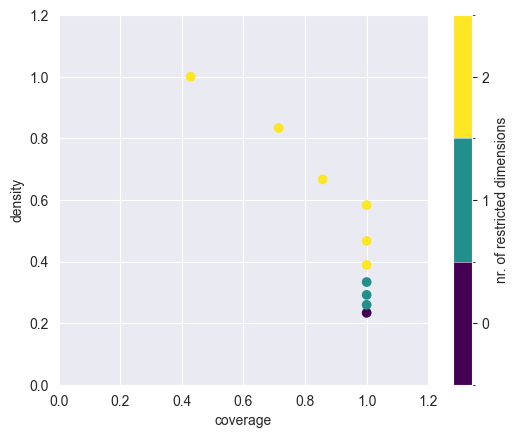

In [41]:
from ema_workbench.analysis import prim

df = pd.DataFrame(outcomes)
df_exp = pd.DataFrame(experiments)
x = df_exp[['A.1_Bmax', 'A.1_pfail', 'A.2_Bmax', 'A.2_pfail', 'A.3_Bmax', 'A.3_pfail', 'A.4_Bmax',  'A.4_pfail', 'A.5_Bmax', 'A.5_pfail']]


y= df['A.2 Total Costs']
y= y < 14990109.1247958

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha = 0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

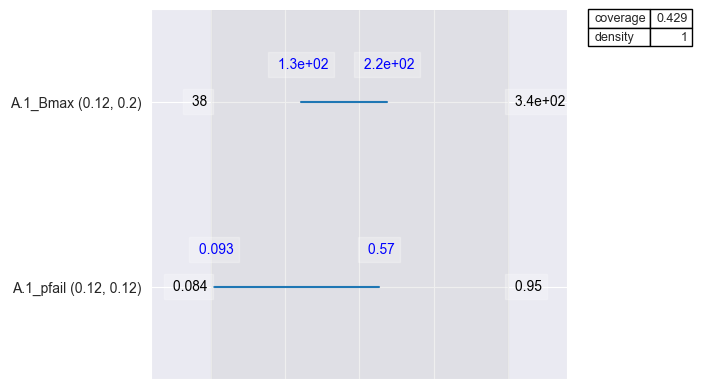

In [42]:
box1.inspect(style='graph')
plt.show()

In [30]:
box1.show_pairs_scatter(4)
plt.show()

IndexError: list index out of range

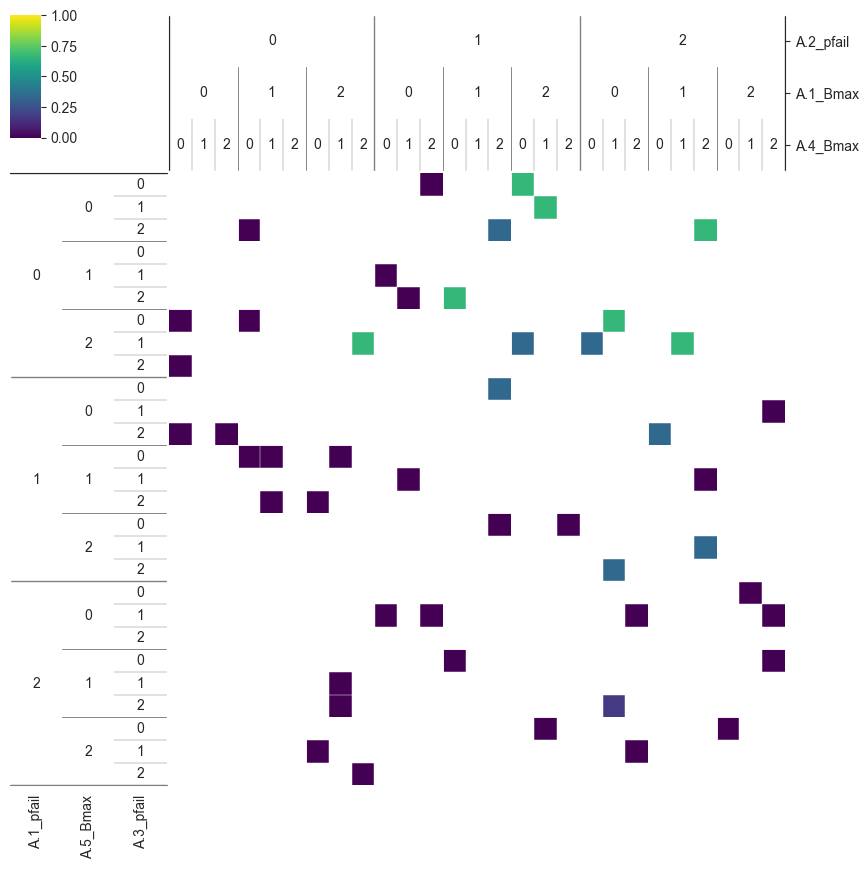

In [44]:
from ema_workbench.analysis import dimensional_stacking

x = df_exp[['A.1_Bmax', 'A.1_pfail', 'A.2_Bmax', 'A.2_pfail', 'A.3_Bmax', 'A.3_pfail', 'A.4_Bmax',  'A.4_pfail', 'A.5_Bmax', 'A.5_pfail']]
y = outcomes["A.5 Total Costs"] < 200000
dimensional_stacking.create_pivot_plot(x, y, 3, nbins=3)
plt.show()

In [ ]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style("white")

# model is the same across experiments
x = experiments.copy()
x = x.drop("model", axis=1)
y = outcomes["max_P"] < 0.8
fig = regional_sa.plot_cdfs(x, y)
sns.despine()
plt.show()